In [1]:
import real_robot.envs
import gym

env = gym.make("PlaceCubeInBowlRealXArm-v8", control_mode="pd_ee_pose",
               obs_mode="rgbd", reward_mode="grounded_sam_sparse_staged_v3",
               image_obs_mode="front", robot_action_scale=100)
env._max_episode_steps = 400
obs = env.reset()

SDK_VERSION: 1.11.6


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


_IncompatibleKeys(missing_keys=[], unexpected_keys=['label_enc.weight'])

Loading GroundingDINO: Took 7.590 seconds

Loading SAM: Took 15.121 seconds
ROBOT_IP: 192.168.1.229, VERSION: v1.12.10, PROTOCOL: V1, DETAIL: 7,7,XS1304,AC1302,v1.12.10, TYPE1300: [1, 1]
change prot_flag to 3
************* GetErrorWarnCode, Status: 0 **************
* ErrorCode: 0, Info: Normal
* WarnCode: 0, Info: Normal
**************************************************
[motion_enable], xArm is not ready to move
[set_state], xArm is ready to move


realsense.py - (realsense.py:32) - INFO - 2023-07-28 13:48 - Found Intel RealSense D435 (S/N: 146322076186 FW: 5.15.0.2 on USB 3.2)
realsense.py - (realsense.py:32) - INFO - 2023-07-28 13:48 - Found Intel RealSense D435 (S/N: 146322072630 FW: 5.15.0.2 on USB 3.2)
realsense.py - (realsense.py:36) - INFO - 2023-07-28 13:48 - Found 2 devices
RSDevice - (realsense.py:126) - INFO - 2023-07-28 13:48 - Loaded "High Accuracy" preset for <RSDevice: Intel RealSense D435 (S/N: 146322072630)>
RSDevice - (realsense.py:75) - INFO - 2023-07-28 13:48 - Setting Depth "option.exposure" to 1500
RSDevice - (realsense.py:138) - INFO - 2023-07-28 13:48 - Started device <RSDevice: Intel RealSense D435 (S/N: 146322072630)> with 2 streams
RSDevice - (realsense.py:140) - INFO - 2023-07-28 13:48 - <pyrealsense2.[video_]stream_profile: Depth(0) 848x480 @ 30fps Z16>
RSDevice - (realsense.py:140) - INFO - 2023-07-28 13:48 - <pyrealsense2.[video_]stream_profile: Color(0) 848x480 @ 30fps RGB8>


FEngine (64 bits) created at 0x56383481c4c0 (threading is enabled)
FEngine resolved backend: OpenGL
************* GetErrorWarnCode, Status: 0 **************
* ErrorCode: 0, Info: Normal
* WarnCode: 0, Info: Normal
**************************************************
[motion_enable], xArm is not ready to move
[set_state], xArm is ready to move


/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:884: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
2023-07-28 13:48:35.062274: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.10/dist-packages/gym/logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


************* GetErrorWarnCode, Status: 0 **************
* ErrorCode: 0, Info: Normal
* WarnCode: 0, Info: Normal
**************************************************
[motion_enable], xArm is not ready to move
[set_state], xArm is ready to move


In [2]:
from collections import defaultdict
self = env.unwrapped
self.grounded_sam_track.box_threshold = 0.1  # 0.3
self.grounded_sam_track.text_threshold = 0.1  # 0.25
self.env_object_texts = ["mug", "mug handle", "red cube", "green bowl"]  # ["red cube", "green bowl"]
self.get_obs()

obs_dict = defaultdict(list)
for cam_name, img_dict in self.recent_camera_obs.items():
    obs_dict["camera_names"].append(cam_name)
    obs_dict["color_images"].append(img_dict["rgb"])
    if "depth" in img_dict:
        obs_dict["depth_images"].append(img_dict["depth"])

if getattr(self, "recent_sam_obs", None) is not None:
    obs_dict["color_images"] = list(self.recent_sam_obs["sam_rgb_images"])
    obs_dict.pop("depth_images")  # FIXME: visualize resized depth images
    obs_dict["pred_masks"] = list(self.recent_sam_obs["pred_masks"])
    obs_dict["xyz_images"] = list(self.recent_sam_obs["sam_xyz_images"])
    for object_text in self.env_object_texts:
        obs_dict[f"{object_text}_pts"] = self.recent_sam_obs["object_pcds"][object_text]
        obs_dict[f"{object_text}_filt_pts"] = self.recent_sam_obs["object_filt_pcds"][object_text]
self.visualizer.reset()
self.visualizer.show_observation(**obs_dict)
self.visualizer.render()

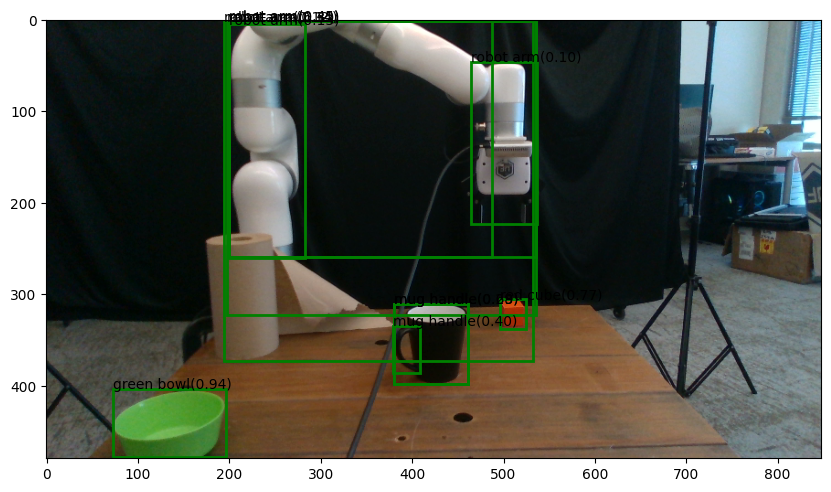

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def show_box(box: np.ndarray, ax, label) -> None:
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green',
                               facecolor=(0, 0, 0, 0), lw=2))
    ax.text(x0, y0, label)

plt.figure(figsize=(10, 10))
plt.imshow(self.recent_sam_obs["sam_rgb_images"][0])
for box, label in zip(self.recent_sam_obs["boxes_filt"][0], self.recent_sam_obs["pred_phrases"][0]):
    show_box(box, plt.gca(), label)
plt.show()

In [8]:
# OWL_ViT
from collections import defaultdict
import torch
import numpy as np
import open3d as o3d
self = env.unwrapped
self.env_object_texts = ["mug", "mug handle"]  # ["red cube", "green bowl"]
self.get_obs()
images = [self._get_obs_images()["image"]["front_camera"]["rgb"]]
text_queries = self.env_object_texts
device = "cuda"

from transformers import OwlViTProcessor, OwlViTForObjectDetection
if 'model' not in dir():
    model = OwlViTForObjectDetection.from_pretrained("google/owlvit-large-patch14")
    processor = OwlViTProcessor.from_pretrained("google/owlvit-large-patch14")
    
# Process image and text inputs
inputs = processor(text=text_queries, images=images, return_tensors="pt").to(device)

# Print input names and shapes
for key, val in inputs.items():
    print(f"{key}: {val.shape}")

# Set model in evaluation mode
model = model.to(device)
model.eval()

# Get predictions
with torch.no_grad():
  outputs = model(**inputs)

for k, val in outputs.items():
    if k not in {"text_model_output", "vision_model_output"}:
        print(f"{k}: shape of {val.shape}")

print("\nText model outputs")
for k, val in outputs.text_model_output.items():
    print(f"{k}: shape of {val.shape}")

print("\nVision model outputs")
for k, val in outputs.vision_model_output.items():
    print(f"{k}: shape of {val.shape}")

from transformers.image_transforms import center_to_corners_format
from transformers.models.owlvit.image_processing_owlvit import box_iou

def post_process_object_detection(outputs, threshold=0.1, nms_threshold=0.3, target_sizes=None):
    logits, boxes = outputs.logits, outputs.pred_boxes

    if target_sizes is not None:
        if len(logits) != len(target_sizes):
            raise ValueError("Make sure that you pass in as many target sizes as the batch dimension of the logits")
        if target_sizes.shape[1] != 2:
            raise ValueError("Each element of target_sizes must contain the size (h, w) of each image of the batch")

    probs = torch.max(logits, dim=-1)
    scores = torch.sigmoid(probs.values)
    labels = probs.indices

    # Convert to [x0, y0, x1, y1] format
    boxes = center_to_corners_format(boxes)

    # Apply non-maximum suppression (NMS)
    if nms_threshold < 1.0:
        for idx in range(boxes.shape[0]):  # batch
            for i in torch.argsort(-scores[idx]):
                if not scores[idx][i]:
                    continue

                ious = box_iou(boxes[idx][i, :].unsqueeze(0), boxes[idx])[0][0]
                ious[i] = -1.0  # Mask self-IoU.
                scores[idx][ious > nms_threshold] = 0.0

    # Convert from relative [0, 1] to absolute [0, height] coordinates
    if target_sizes is not None:
        img_h, img_w = target_sizes.unbind(1)
        scale_fct = torch.stack([img_w, img_h, img_w, img_h], dim=1)
        boxes = boxes * scale_fct[:, None, :]
    

    results = []
    for s, l, b in zip(scores, labels, boxes):
        score = s[s > threshold]
        label = l[s > threshold]
        box = b[s > threshold]
        results.append({"scores": score, "labels": label, "boxes": box})
    return results

# Target image sizes (height, width) to rescale box predictions [batch_size, 2]
target_sizes = torch.Tensor([image.shape[:2] for image in images]).to(device)

# Convert outputs (bounding boxes and class logits) to COCO API
results = post_process_object_detection(outputs=outputs, threshold=0.1, nms_threshold=1.0,  # NOTE: no NMS
                                        target_sizes=target_sizes)

for k, val in results[0].items():
    print(f"{k}: shape of {val.shape}")

def run_sam(env, images, results):
    self = env.grounded_sam_track
    batched_output = []

    # run SAM model on 1-image batch (on 11GB GPU)
    for image, result in zip(images, results):
        boxes_filt = result["boxes"]  # [n_boxes, 4]
        processed_image = self.sam_resize_transform.apply_image(
            image
        )
        processed_image = torch.as_tensor(
            processed_image, device=self.device
        ).permute(2, 0, 1).contiguous()

        output = self.sam_model([{
            'image': processed_image,
            'boxes': self.sam_resize_transform.apply_boxes_torch(
                boxes_filt.to(self.device), image.shape[:2]
            ),
            'original_size': image.shape[:2],
        }], multimask_output=False)[0]

        # Copy from GPU to CPU
        output = {k: v.cpu() for k, v in output.items()}
        batched_output.append(output)
    pred_masks_batch = [d["masks"] for d in batched_output]
    
    return pred_masks_batch

from typing import List, Dict
def merge_pred_masks(results: List[Dict[str, torch.Tensor]],
                     pred_masks_batch: List[torch.Tensor],
                     text_queries_batch: List[str],
                     extra_masks_batch: List[np.ndarray] = None):
    def find_most_confident_label(pred_labels, pred_scores, label: int):
        pred_label_idx = None
        best_score = 0.0
        for i, (pred_label, pred_score) in enumerate(zip(pred_labels, pred_scores)):
            if pred_label == label and float(pred_score) > best_score:
                pred_label_idx = i
                best_score = float(pred_score)
        return pred_label_idx

    num_images = len(results)
    if isinstance(text_queries_batch[0], str):
        text_queries_batch = [text_queries_batch] * num_images
    if extra_masks_batch is None:
        extra_masks_batch = [None] * num_images
    assert (len(results) == len(pred_masks_batch)
            == len(text_queries_batch) == len(extra_masks_batch)), \
        (f"{len(results)} pred_phrases"
            f" != {len(pred_masks_batch)} pred_masks"
            f" != {len(text_queries_batch)} object_labels"
            f" != {len(extra_masks_batch)} extra_masks")

    pred_masks_pruned = []

    for img_i, result in enumerate(results):
        pred_labels = result["labels"]
        pred_scores = result["scores"]
        pred_masks = pred_masks_batch[img_i]
        text_queries = text_queries_batch[img_i]
        extra_mask = extra_masks_batch[img_i]

        pred_masks_pruned.append(np.zeros(pred_masks.shape[-2:],
                                          dtype=np.uint8))

        for label_i, text_query in enumerate(text_queries):
            pred_label_idx = find_most_confident_label(pred_labels,
                                                       pred_scores,
                                                       label_i)
            if pred_label_idx is None:  # label not found
                print(f"Label {text_query} not found")
                continue

            pred_mask = pred_masks[pred_label_idx, 0]  # [H, W]
            if extra_mask is None:
                pred_masks_pruned[-1][pred_mask] = label_i+1
            else:
                pred_masks_pruned[-1][extra_mask & pred_mask] = label_i+1

    return pred_masks_pruned

pred_masks_batch = run_sam(self, images, results)
pred_masks = merge_pred_masks(results, pred_masks_batch, text_queries)
pred_masks = np.stack(pred_masks, axis=0)  # [n_cams, H, W]

# TODO: temporary
owlvit_sam_obs = {}
xyz_images = self.recent_sam_obs["sam_xyz_images"]
owlvit_sam_obs["pred_masks"] = pred_masks

# Extract pcd from xyz_images
object_pcds = {}
object_filt_pcds = {}
for i, object_text in enumerate(self.env_object_texts):
    object_pcd = xyz_images[pred_masks == i+1]
    object_pcds[object_text] = object_pcd
    object_filt_pcds[object_text] = self._process_pts(
        object_pcd, self.voxel_downsample_size,
        self.nb_neighbors, self.std_ratio
    )
owlvit_sam_obs["object_pcds"] = object_pcds
owlvit_sam_obs["object_filt_pcds"] = object_filt_pcds

# Visualization
obs_dict = defaultdict(list)
for cam_name, img_dict in self.recent_camera_obs.items():
    obs_dict["camera_names"].append(cam_name)
    obs_dict["color_images"].append(img_dict["rgb"])
    if "depth" in img_dict:
        obs_dict["depth_images"].append(img_dict["depth"])

if getattr(self, "recent_sam_obs", None) is not None:
    obs_dict["color_images"] = list(self.recent_sam_obs["sam_rgb_images"])
    obs_dict.pop("depth_images")  # FIXME: visualize resized depth images
    obs_dict["pred_masks"] = list(owlvit_sam_obs["pred_masks"])
    obs_dict["xyz_images"] = list(self.recent_sam_obs["sam_xyz_images"])
    for object_text in self.env_object_texts:
        obs_dict[f"{object_text}_pts"] = owlvit_sam_obs["object_pcds"][object_text]
        obs_dict[f"{object_text}_filt_pts"] = obj_pts = owlvit_sam_obs["object_filt_pcds"][object_text]
        obj_pts_mins, obj_pts_maxs = obj_pts.min(0), obj_pts.max(0)
        obs_dict[f"{object_text}_bbox"] = o3d.geometry.AxisAlignedBoundingBox(
            obj_pts_mins, obj_pts_maxs
        )
        obs_dict[f"{object_text}_pos_pts"] = np.mean([obj_pts_mins, obj_pts_maxs], axis=0)
self.visualizer.reset()
self.visualizer.show_observation(**obs_dict)
self.visualizer.render()

Label mug handle not found
input_ids: torch.Size([2, 16])
attention_mask: torch.Size([2, 16])
pixel_values: torch.Size([1, 3, 840, 840])
logits: shape of torch.Size([1, 3600, 2])
pred_boxes: shape of torch.Size([1, 3600, 4])
text_embeds: shape of torch.Size([1, 2, 768])
image_embeds: shape of torch.Size([1, 60, 60, 1024])
class_embeds: shape of torch.Size([1, 3600, 768])

Text model outputs
last_hidden_state: shape of torch.Size([2, 16, 768])
pooler_output: shape of torch.Size([2, 768])

Vision model outputs
last_hidden_state: shape of torch.Size([1, 3601, 1024])
pooler_output: shape of torch.Size([1, 1024])
scores: shape of torch.Size([4])
labels: shape of torch.Size([4])
boxes: shape of torch.Size([4, 4])
[entity=91, primitive @ 0] missing required attributes (0xf), declared=0x5
[entity=95, primitive @ 0] missing required attributes (0xf), declared=0x5
ControllerError, code: 1


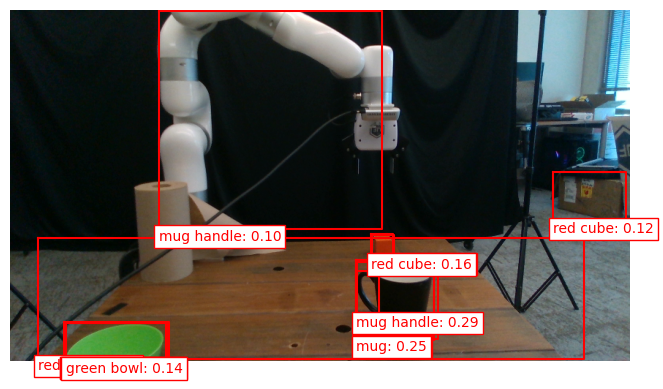

In [4]:
import matplotlib.pyplot as plt

def plot_predictions(input_image, text_queries, scores, boxes, labels):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.imshow(input_image)
    ax.set_axis_off()

    for score, box, label in zip(scores, boxes, labels):
      x_min, y_min, x_max, y_max = box
      ax.plot([x_min, x_max, x_max, x_min, x_min],
                [y_min, y_min, y_max, y_max, y_min], "r")
      ax.text(
          x_min,
          y_max + 0.015,
          f"{text_queries[label]}: {score:1.2f}",
          ha="left",
          va="top",
          color="red",
          bbox={
              "facecolor": "white",
              "edgecolor": "red",
              "boxstyle": "square,pad=.3"
          })

input_image = np.asarray(images[0]).astype(np.float32) / 255.0
scores, boxes, labels = results[0]["scores"].cpu().numpy(), results[0]["boxes"].cpu().numpy(), results[0]["labels"].cpu().numpy()
plot_predictions(input_image, text_queries, scores, boxes, labels)

In [5]:
self.visualizer.render()

In [12]:
env.agent.reset()

************* GetErrorWarnCode, Status: 0 **************
* ErrorCode: 0, Info: Normal
* WarnCode: 0, Info: Normal
**************************************************
[motion_enable], xArm is not ready to move
[set_state], xArm is ready to move


In [6]:
mug_pos = obs_dict["mug_pos_pts"]
handle_pos = obs_dict["mug handle_pos_pts"]
approaching = mug_pos - handle_pos  # tcp_z
approaching /= np.linalg.norm(approaching)
down = np.array([0, 0, -1.0])  # tcp_x
closing = np.cross(approaching, down)  # tcp_y
closing /= np.linalg.norm(closing)
approaching, closing

(array([ 0.89096174, -0.44999886, -0.06073062]),
 array([0.450831  , 0.89260932, 0.        ]))

In [7]:
grasp_ori_pose = env.agent.build_grasp_pose(env.agent.get_tcp_pose().p, approaching, closing)
pre_grasp_pos = handle_pos - 0.05*approaching
pre_grasp_xy_pose = env.agent.build_grasp_pose(np.hstack([pre_grasp_pos[:2],
                                                          env.agent.get_tcp_pose().p[-1]]), approaching, closing)
pre_grasp_pose = env.agent.build_grasp_pose(pre_grasp_pos, approaching, closing)
grasp_pose = env.agent.build_grasp_pose(handle_pos, approaching, closing)
lift_pose = env.agent.build_grasp_pose(handle_pos + [0, 0, 0.1], approaching, closing)

from transforms3d.euler import quat2euler
def get_action(pose, close_gripper=False):
    action = np.hstack([pose.p, quat2euler(pose.q), [-1 if close_gripper else 1]])
    return action

env.step_action(get_action(grasp_ori_pose))
env.step_action(get_action(pre_grasp_xy_pose))
env.step_action(get_action(pre_grasp_pose))
env.step_action(get_action(grasp_pose))
env.step_action(get_action(grasp_pose, True))
env.step_action(get_action(lift_pose, True))

XArm7 - (xarm.py:170) - INFO - 2023-07-28 13:50 - Setting action = array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  4.89606023e-05,
       -1.51001890e+00, -1.10315036e+00,  8.50000000e+02])
XArm7 - (xarm.py:170) - INFO - 2023-07-28 13:50 - Setting action = array([-1.11424255e+00, -3.00542664e+02,  1.83009644e+01, -2.39908236e-06,
       -3.82960162e-06, -2.47358831e-06,  8.50000000e+02])
XArm7 - (xarm.py:170) - INFO - 2023-07-28 13:50 - Setting action = array([ 1.32106613e+02, -2.97546387e-04,  8.03652954e+00,  2.38419077e-06,
        3.90782649e-06,  2.54810322e-06,  8.50000000e+02])
XArm7 - (xarm.py:170) - INFO - 2023-07-28 13:51 - Setting action = array([6.56127930e-04, 4.73022461e-04, 4.99999390e+01, 3.42726716e-07,
       1.49011592e-07, 1.19209315e-07, 8.50000000e+02])
XArm7 - (xarm.py:170) - INFO - 2023-07-28 13:51 - Setting action = array([-5.95092773e-04,  4.57763672e-05,  6.10351562e-04,  7.45058077e-08,
        2.98023179e-08,  1.19209291e-07, -1.00000000e+01])
XA

In [15]:
env.agent.get_tcp_pose().p

array([ 4.6386558e-01, -2.0109396e-06,  1.8687008e-01], dtype=float32)

In [ ]:
above_cube_pose = env.agent.build_grasp_pose(cube_pos + [0, 0, 0.1])
cube_pose = env.agent.build_grasp_pose(cube_pos)
above_bowl_pose = env.agent.build_grasp_pose(bowl_pos + [0, 0, 0.1])
bowl_pose = env.agent.build_grasp_pose(bowl_pos + [0, 0, 0.01])

above_cube_pose, cube_pose, above_bowl_pose, bowl_pose

from transforms3d.euler import quat2euler
def get_action(pose, close_gripper=False):
    action = np.hstack([pose.p, quat2euler(pose.q), [-1 if close_gripper else 1]])
    return action

env.step_action(get_action(above_cube_pose))
env.step_action(get_action(cube_pose))
env.step_action(get_action(cube_pose, True))
env.step_action(get_action(above_cube_pose, True))
env.step_action(get_action(above_bowl_pose, True))
env.step_action(get_action(bowl_pose, True))
env.step_action(get_action(bowl_pose, False))

input_ids: torch.Size([6, 16])
attention_mask: torch.Size([6, 16])
pixel_values: torch.Size([1, 3, 840, 840])
logits: shape of torch.Size([1, 3600, 6])
pred_boxes: shape of torch.Size([1, 3600, 4])
text_embeds: shape of torch.Size([1, 6, 768])
image_embeds: shape of torch.Size([1, 60, 60, 1024])
class_embeds: shape of torch.Size([1, 3600, 768])

Text model outputs
last_hidden_state: shape of torch.Size([6, 16, 768])
pooler_output: shape of torch.Size([6, 768])

Vision model outputs
last_hidden_state: shape of torch.Size([1, 3601, 1024])
pooler_output: shape of torch.Size([1, 1024])


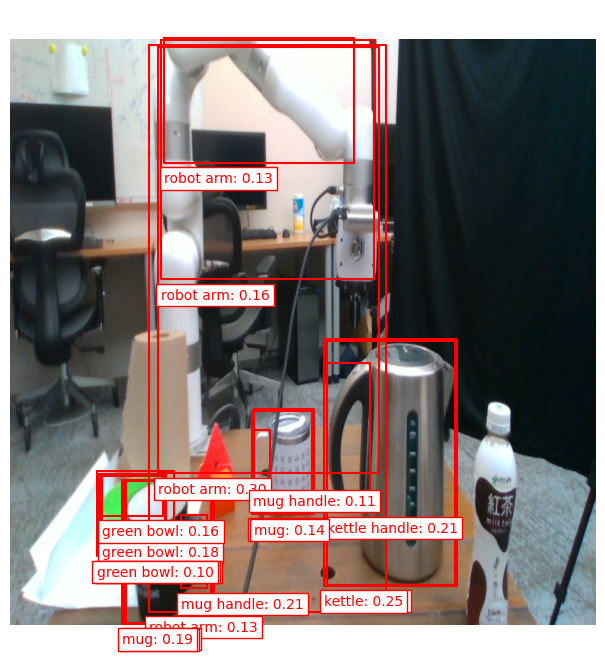

In [5]:
import torch
image = rgb_images[0]
text_queries = ["mug handle", "robot arm", "green bowl", "mug", "kettle handle", "kettle"]
device = "cuda"

# Process image and text inputs
inputs = processor(text=text_queries, images=image, return_tensors="pt").to(device)

# Print input names and shapes
for key, val in inputs.items():
    print(f"{key}: {val.shape}")

# Set model in evaluation mode
model = model.to(device)
model.eval()

# Get predictions
with torch.no_grad():
  outputs = model(**inputs)

for k, val in outputs.items():
    if k not in {"text_model_output", "vision_model_output"}:
        print(f"{k}: shape of {val.shape}")

print("\nText model outputs")
for k, val in outputs.text_model_output.items():
    print(f"{k}: shape of {val.shape}")

print("\nVision model outputs")
for k, val in outputs.vision_model_output.items():
    print(f"{k}: shape of {val.shape}") 

import matplotlib.pyplot as plt

from transformers.image_utils import ImageFeatureExtractionMixin
mixin = ImageFeatureExtractionMixin()

# Load example image
image_size = model.config.vision_config.image_size
image = mixin.resize(image, image_size)
input_image = np.asarray(image).astype(np.float32) / 255.0

# Threshold to eliminate low probability predictions
score_threshold = 0.1

# Get prediction logits
logits = torch.max(outputs["logits"][0], dim=-1)
scores = torch.sigmoid(logits.values).cpu().detach().numpy()

# Get prediction labels and boundary boxes
labels = logits.indices.cpu().detach().numpy()
boxes = outputs["pred_boxes"][0].cpu().detach().numpy()

def plot_predictions(input_image, text_queries, scores, boxes, labels):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.imshow(input_image, extent=(0, 1, 1, 0))
    ax.set_axis_off()

    for score, box, label in zip(scores, boxes, labels):
      if score < score_threshold:
        continue

      cx, cy, w, h = box
      ax.plot([cx-w/2, cx+w/2, cx+w/2, cx-w/2, cx-w/2],
              [cy-h/2, cy-h/2, cy+h/2, cy+h/2, cy-h/2], "r")
      ax.text(
          cx - w / 2,
          cy + h / 2 + 0.015,
          f"{text_queries[label]}: {score:1.2f}",
          ha="left",
          va="top",
          color="red",
          bbox={
              "facecolor": "white",
              "edgecolor": "red",
              "boxstyle": "square,pad=.3"
          })
    
plot_predictions(input_image, text_queries, scores, boxes, labels)